# Stanford CME 241 (Winter 2025) - Assignment 3

**Due: Sunday, February 23 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/ardbeg-10/RL-book/blob/master/assignments/assignment3.ipynb

*Group members (replace below names with people in your group):* 
- Yuteng Zhuang
- James Liu
- Person 3

## Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from typing import Iterable, Iterator, Mapping, TypeVar, Callable, Sequence, Tuple, Dict
from rl.distribution import Categorical
from rl.markov_process import FiniteMarkovRewardProcess
from rl.chapter10.prediction_utils import compare_td_and_mc
X = TypeVar('X')
S = TypeVar('S')

from scipy.integrate import quad
import math

## Question 1: Milk Vendor Optimization Problem (Led by Yuteng & James)

You are a milk vendor and your task is to bring to your store a supply (denoted $S \in \mathbb{R}$) of milk volume in the morning that will give you the best profits. You know that the demand for milk throughout the course of the day is a probability distribution function $f$ (for mathematical convenience, assume people can buy milk in volumes that are real numbers, hence milk demand $x \in \mathbb{R}$ is a continuous variable with a probability density function). 

For every extra gallon of milk you carry at the end of the day (supply $S$ exceeds random demand $x$), you incur a cost of $h$ (effectively the wasteful purchases amounting to the difference between your purchase price and the end-of-day discount disposal price since you are not allowed to sell the same milk the next day). For every gallon of milk that a customer demands that you don’t carry (random demand $x$ exceeds supply $S$), you incur a cost of $p$ (effectively the missed sales revenue amounting to the difference between your sales price and purchase price). 

Your task is to identify the optimal supply $S$ that minimizes your **Expected Cost** $g(S)$, given by:

$$
g_1(S) = \mathbb{E}[\max(x - S, 0)] = \int_{S}^{\infty} (x - S) \cdot f(x) \, dx
$$

$$
g_2(S) = \mathbb{E}[\max(S - x, 0)] = \int_{-\infty}^{S} (S - x) \cdot f(x) \, dx
$$

$$
g(S) = p \cdot g_1(S) + h \cdot g_2(S)
$$

---

### Part (A): Analytical Optimization

1. **Derive the first-order condition (FOC)** for minimizing the expected cost $g(S)$.
2. **Solve the FOC** to express the optimal supply $S^*$ in terms of the given parameters: $p$, $h$, and the demand distribution $f(x)$. (*Hint*: Pay attention to the balance between the costs of overstocking and understocking)

3. **Interpretation**: Provide an interpretation of the condition you derived. What does the balance between $p$ and $h$ imply about the optimal supply $S^*$?

---

### Part (B): Special Case Analysis

1. Consider the case where the demand $x$ follows an **exponential distribution** with parameter $\lambda > 0$. That is, $f(x) = \lambda e^{-\lambda x}$ for $x \geq 0$.
    - Derive an explicit expression for the optimal supply $S^*$.
    
2. Consider the case where the demand $x$ follows a **normal distribution** with mean $\mu$ and variance $\sigma^2$, i.e., $x \sim \mathcal{N}(\mu, \sigma^2)$. 
    - Set up the integral for $g(S)$ and describe how it relates to the **cumulative distribution function (CDF)** of the normal distribution.
    - Provide an interpretation of how changes in $\mu$ and $\sigma$ influence the optimal $S^*$. 

---

### Part (C): Framing as a Financial Options Problem

1. Frame the milk vendor’s problem as a **portfolio of call and put options**:
    - Identify the analog of the “strike price” and “underlying asset.”
    - Explain which part of the cost function $g_1(S)$ or $g_2(S)$ corresponds to a call option and which part to a put option.
    - What do $p$ and $h$ represent in this options framework?

2. Explain how this framing could be used to derive the optimal supply $S^*$ if solved using financial engineering concepts.

---

### Part (D): Numerical Solution and Simulation

1. **Numerical Solution**: Write a Python function that numerically estimates the optimal $S^*$ using an iterative search or numerical optimization method. 

2. **Simulation**: Generate random samples of milk demand from an exponential distribution and simulate the total costs for different values of $S$. Plot the costs against $S$ and visually identify the optimal $S$.

### Part (A) Answer
Given the following variables.
$$
g_1(S) = \mathbb{E}[\max(x - S, 0)] = \int_{S}^{\infty} (x - S) \cdot f(x) \, dx
$$

$$
g_2(S) = \mathbb{E}[\max(S - x, 0)] = \int_{-\infty}^{S} (S - x) \cdot f(x) \, dx
$$

$$
g(S) = p \cdot g_1(S) + h \cdot g_2(S)
$$

By applying Leibniz Integral Rule, we have
$$
\frac{d}{dS}\int_{S}^{\infty} (x-S)f(x)dx = 0 - (S-S)f(S)+\int_{S}^{\infty}-f(x)dx = -\int_{S}^{\infty}f(x)dx
$$
$$
\frac{d}{dS}\int_{-\infty}^{S} (S-x)f(x)dx = (S-S)f(S)- 0 +\int_{-\infty}^{S}f(x)dx = \int_{-\infty}^{S}f(x)dx 
$$
Since f(x) is the probability mass function. Suppose F(x) is its correspondiong Probability Density function. Then, we have $F(S) = \int_{-\infty}^{S}f(x)dx$.
Considering the first order condition:
$$
\begin{aligned}
g'(S) &= p \cdot -\int_{S}^{\infty}f(x)dx + h \cdot \int_{-\infty}^{S}f(x)dx \\
&= -p (1-F(S)) + h F(S) \\
&= 0
\end{aligned}
$$
This gives $F(S) = \frac{p}{p+h}$. According to the definition of PDF, the value of optimal S, $S^*$, is $\frac{p}{p+h}$ quantile of distribution.  
By observing the formula of $g_1(x)$ and $g_2(x)$, we know that $p$ is the cost of lack of milk and $h$ is the cost of excess milk. When value of $p$ increases, there is higher cost for lack of milk. So, percentile $g$ increases, showing that milk vendor should increase store supply. When value of $h$ increases, there is higher cost for excess milk supply. So, percentile $g$ decreases, showing that milk vendor should decrease store supply.

### Part (B) Answer

Consider $x$ follows exponential distribution. It's corresponding PDF is $F(x) = 1 - e^{-\lambda x}$. From  part a, we derive $F(S) = \frac{p}{p+h}$. Therefore, consider the optimal value of $S$ 
$$
F(S^*) = 1 - e^{-\lambda S^*} = \frac{p}{p+h} \\
e^{-\lambda S^*} = -\frac{h}{p+h} \\
S^* = -\frac{1}{\lambda} (ln(h) - ln(p+h))
$$

Then consider $x$ follows normal distribution such that $x \sim \mathcal{N}(\mu, \sigma^2)$.
Then its CDF is $\Phi (\frac{x-\mu}{\sigma})$  Therefore, consider the optimal value of $S$ we have:
$$
\begin{aligned}
F(S^*) &= \Phi (\frac{S^*-\mu}{\sigma}) \\
&= \frac{p}{p+h}
\end{aligned}
$$
Consider the inverse function of $\Phi$, which is the map between the probability and value, we have  
$$
S^* = \mu + \sigma \Phi^{-1} (\frac{p}{p+h})
$$
Then substitude with optimal value of $S$ we have:
$$
\begin{aligned}
g(S^*) &= p \cdot g_1(S^*) + h \cdot g_2(S^*) \\
&= p \cdot g_1(\mu + \sigma \Phi^{-1} (\frac{p}{p+h})) + h \cdot g_2(\mu + \sigma \Phi^{-1} (\frac{p}{p+h})) \\
&= p \cdot \int_{\mu + \sigma \Phi^{-1} (\frac{p}{p+h})}^{\infty} (x - \mu + \sigma \Phi^{-1} (\frac{p}{p+h})) \cdot f(x) \, dx + h \cdot  \int_{-\infty}^{\mu + \sigma \Phi^{-1} (\frac{p}{p+h})} (\mu + \sigma \Phi^{-1} (\frac{p}{p+h}) - x) \cdot f(x) \, dx
\end{aligned}
$$
Notice that CDF is monotonically increasing function. Higher $\mu$ may lead to higher value of $S$. Higer value of $\sigma$ will magnify the deviation from mean.

### Part (C) Answer

In this problem, the strike price is supply of milk volume $S$, the underlying asset is demand of milk volume $x$. Call option happens when underlying asset performs better which analog to $g_1(S)$; while put option happens when underlying asset performs worse which is $g_2(S)$. $p$ and $h$ are weights for $g_1(S)$ and $g_2(S)$. $p$ is unit cost when demand exceeds supply and $h$ is unit cost when supply is hgiher than demand.  
In the point of view of financial engineering, we need to find the optimal "strike price" $S^*$ that minimize the total cost of "portfolio". And $S^*$ are used to balance the "Call" and "Put" costs from our total cost model.


### Part (D) Answer

In [ ]:
'''
fill in the code below, and then run the code in the next cell for the simulation
'''

# simulation parameters
p = 5  # Cost of understocking (per unit)
h = 2  # Cost of overstocking (per unit)
lambda_param = 1.0  # Parameter for exponential distribution

# Probability density function for demand
def demand_pdf(x):
    return lambda_param * np.exp(-lambda_param * x)

# Cumulative distribution function for demand
def demand_cdf(x):
    return 1 - np.exp(-lambda_param * x)

# Expected cost function g(S)
def expected_cost(S):
    # g1(S): Understocking cost
    def under_cost(x):
        return (x - S) * demand_pdf(x)
    g1_, _ = quad(under_cost, S, np.inf)
    g1 = g1_ * p
    
    # g2(S): Overstocking cost (integral using CDF)
    def over_cost(x):
        return (S-x) * demand_pdf(x)
    # Since deman S is non-negative, use 0 as lower limit instead.
    g2_, _ = quad(over_cost, 0, S)
    g2 = g2_ * h
    
    return g1 + g2

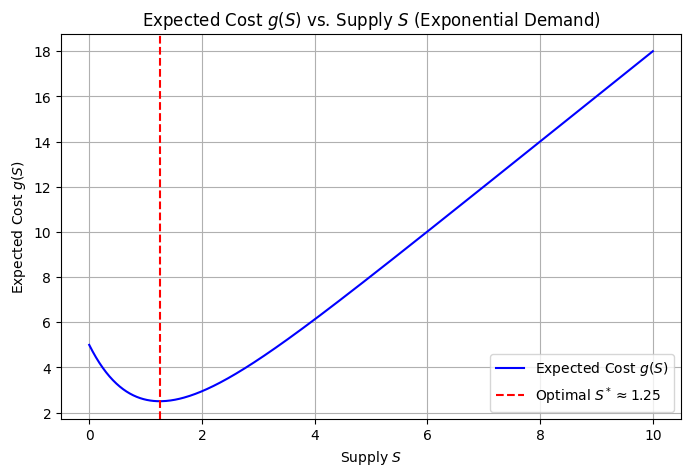

1.2527630511674466

In [23]:
result = minimize_scalar(expected_cost, bounds=(0, 10), method='bounded')
optimal_S = result.x

# Simulation of costs
S_values = np.linspace(0, 10, 500)
costs = [expected_cost(S) for S in S_values]

# Plotting the costs against S
plt.figure(figsize=(8, 5))
plt.plot(S_values, costs, label="Expected Cost $g(S)$", color='blue')
plt.axvline(optimal_S, color='red', linestyle='--', label=f"Optimal $S^* \\approx {optimal_S:.2f}$")
plt.xlabel("Supply $S$")
plt.ylabel("Expected Cost $g(S)$")
plt.title("Expected Cost $g(S)$ vs. Supply $S$ (Exponential Demand)")
plt.legend()
plt.grid(True)
plt.show()

optimal_S

## Question 2: Optimal Bank Cash Management with Risky Investments and Penalties (Led By: Yuteng & James)

Assume you are the owner of a bank where customers come in randomly every day to make cash deposits and to withdraw cash from their accounts. At the end of each day, you can borrow (from another bank, without transaction costs) any cash amount $y > 0$ at a constant daily interest rate $R$, meaning you will need to pay back a cash amount of $y(1 + R)$ at the end of the next day. Also, at the end of each day, you can invest a portion of your bank’s cash in a risky (high return, high risk) asset. Assume you can change the amount of your investment in the risky asset each day, with no transaction costs (this is your mechanism to turn any amount of cash into risky investment or vice-versa).

A key point here is that once you make a decision to invest a portion of your cash in the risky asset at the end of a day, you will not have access to this invested amount as cash that otherwise could have been made available to customers who come in the next day for withdrawals. More importantly, if the cash amount $c$ in your bank at the start of a day is less than $C$, the banking regulator will make you pay a penalty of $K \cdot \cot\left( \frac{\pi c}{2C} \right)$ (for a given constant $K > 0$).

For convenience, we make the following assumptions:
- Assume that the borrowing and investing is constrained so that we end the day (after borrowing and investing) with positive cash ($c > 0$) and that any amount of regulator penalty can be immediately paid (meaning $c \geq K \cdot \cot\left( \frac{\pi c}{2C} \right)$ when $c \leq C$).
- Assume that the deposit rate customers earn is so small that it can be ignored.
- Assume for convenience that the first half of the day is reserved for only depositing money and the second half of the day is reserved for only withdrawal requests.
- Assume that if you do not have sufficient cash to fulfill a customer withdrawal request, you ask the customer to make the withdrawal request again the next day.
- Assume all quantities are continuous variables.

---

### Part (A): MDP Modeling

Model the bank’s problem as a **Markov Decision Process (MDP)** with the goal of maximizing the **Expected Utility of assets less liabilities** at the end of a $T$-day horizon, conditional on any current situation of assets and liabilities.

1. **State Space**: Define the possible states of the system.
2. **Action Space**: Specify the possible actions available to the bank at each state.
3. **Transition Function**: Describe how the state evolves based on the current state and the chosen action.
4. **Reward Function**: Specify the reward structure that incentivizes optimal behavior.

*Note*: Be very careful with your notation; ensure that every subscript, index, superscript, prime, etc. is properly defined and necessary. There are a lot of variables at play, so everything must be properly defined or points will be deducted.

---

### Part (B): Reinforcement Learning Approach

In a practical setting, we do not know the exact probability distributions of the customer deposits and withdrawals. Neither do we know the exact stochastic process of the risky asset. But assume we have access to a large set of historical data detailing daily customer deposits and withdrawal requests, as well as daily historical market valuations of the risky asset. Assume we also have data on new customers as well as leaving customers (sometimes due to their withdrawal requests not being satisfied promptly).

Describe your approach to solving this problem with **Reinforcement Learning** by using the historical data described above.

1. Specify which **Reinforcement Learning algorithm** you would use, including any customizations for this problem.
2. Provide sufficient detail that will enable a programmer with knowledge of RL to implement your ideas.

*Note*: You are not expected to write any code for this part.

### Part (A) Answer

- State Space: $s_t = (c_t, r_t, d_t, w_t)$. Where $c_t$ represents bank's available cash, $r_t$ represents the value of bank's risky asset, $d_t$ and $w_t$ represents the amount of money that is deposited and withdrawn in day $t$.  
- Action Space: $a_t = (b_t, i_t)$. Where $b_t$ represents the amount of money borrowed from the other bank and $i_t$ represents the amoun of money invest in risky assets.  
- Transition Function: Consider $s_t = (c_t, r_t, d_t, w_t)$, $a_t = (b_t, i_t)$.
$$
c'_t = c_t + d_t - w_t + b_t - i_t 
$$
$$
c''_t = c'_t + \mathbf{1}_{\{ c'_t < C \}}K \cdot \cot\left( \frac{\pi c}{2C} \right)
$$
$$
c_{t+1} = c''_t - (1+R)b_t
$$
$$
r_{t+1} = r_t (1 + \delta_t) + i_t
$$
$\delta_t$ is the percentage of change in market value of risky assets in day $t$. This variable can be obtained from observation or sampling.  
$d_t$ and $w_t$ are random variables that might be obtain from observation or sample from some specific distribution. That is, the change of c and r are deterministic but the change for d and w are based on their distribuion.
Therefore, we have obtained the next state $s_{t+1} = (c_{t+1}, r_{t+1}, d_{t+1}, w_{t+1})$  
- Reward Function: The reward can be measured by the value of total assets.
$$
r_t = R(s_t, a_t) = c_{t+1} + r_{t+1}
$$
Note that we have defined $c_{t+1}$ and $r_{t+1}$ in transition probability.

### Part (B) Answer

We have state space $s_t = (c_t, r_t, d_t, w_t)$, action space $a_t = (b_t, i_t)$, and suppose we have a simulator that can return reward based on state and action.  
Consider we use the algorithm Monte Carlo Control with $\epsilon$-greedy.  
- Initialize value function $Q(s,a)$ as all zeros, and random policy $\pi$
- Start from initial state $s_0$, use current policy $\pi$ to genenrate trajectory (s_0, a_0, r_0, ..., s_T).
- Use Monte-Carlo Incremental Update method to evaluate q-value function repeate the following steps util converge:
    - Calulate cumulative discounted reward $G_t$
    - $Q(s, a) = Q(s, a) + \alpha (G_t - Q(s, a))$
- Use $\epsilon$-greedy to improve policy $\pi$.
- Use updated policy to generate new trajectory and repeate the above step util converge (norm change smaller than tolerance).


## Question 3: Career Optimization (Led By: Yuteng & James)

Imagine you live in a world where every job is an hourly-wage job. You have $H$ available hours in a day (for some fixed $H \in \mathbb{Z}^+$), and each morning when you leave your house, you can decide to split those $H$ hours into:

- Hours spent on learning to get better at your current job (call it $l \in \mathbb{Z}_{\geq 0}$),
- Hours spent on searching for another job (call it $s \in \mathbb{Z}_{\geq 0}$), and
- Remaining $H - l - s$ hours spent on actually working on your current job.

If your job currently pays you at an hourly-wage of $w$ dollars, then at the end of that day, you will be given a cash amount of $w \cdot (H - l - s)$ dollars. We assume that any hourly-wage $w$ in our world is an integer in the finite set $\{1, 2, \dots, W\}$ for some fixed $W \in \mathbb{Z}^+$.

Each employer has a wage model such that if you spend $l$ hours on learning on a given day where your hourly-wage was $w$, then the employer sends you an email the next morning with that new day’s hourly-wage of:  
$$\min(w + x, W)$$  
where $x$ is a Poisson random variable with mean $\alpha \cdot l$ for some fixed $\alpha \in \mathbb{R}^+$.

Each morning, with probability $\frac{\beta s}{H}$ for some fixed $\beta \in [0, 1]$, you will receive an email from another employer with a job-offer with hourly-wage of  
$$\min(w + 1, W)$$  
where $w$ was the hourly wage of the job you were on the previous day and $s$ is the number of hours you spent on job-search the previous day.

You read all your emails before you leave your house in the morning. If another job is offered to you and if the hourly-wage of that job is greater than your current employer’s hourly-wage stated in that morning’s email, then you accept the other job. Otherwise, you continue in your current job. Whichever job you decide to do, each morning when you leave your house, you decide how to split the $H$ hours of that day into learning hours, job-searching hours, and working hours.

Your goal is to maximize the **Expected (Discounted) Wages** earned over an infinite horizon (assume you never age and will live infinitely). The daily discount factor is a fixed $0 < \gamma < 1$.

---

### Part (A): MDP Modeling

With proper mathematical notation, model this as a **Finite MDP** specifying the states, actions, rewards, state-transition probabilities, and discount factor. Be very precise with your notation!!

---

### Part (B): Python Implementation

Implement this MDP in Python. If you wish, you may use the code in the git repo that you forked at the start of the course (e.g., `FiniteMarkovDecisionProcess`), but if you prefer, you can implement it from scratch or use any code you have written for the course previously (whichever is more convenient for you).

---

### Part (C): Solving for the Optimal Policy

Solve for the **Optimal Value Function** and **Optimal Policy** using **Value Iteration**. If you wish, you may use the code in the git repo that you forked at the start of the course (e.g., `rl/dynamic_programming.py`), but if you prefer, you can implement it from scratch or use any code you have written for the course previously (whichever is more convenient for you).

---

### Part (D): Visualization

Plot a graph of the **Optimal Policy** (or print the optimal policy) for the following configuration:  
$H = 10$, $W = 30$, $\alpha = 0.08$, $\beta = 0.82$, $\gamma = 0.95$.  

Provide an intuitive explanation for this optimal policy.


### Part (A) Answer

- State Space: $s_t = \{w_t\}$, where $w_t$ represents the hourly wage at that day.
- Action Space: $a_t = \{l_t, s'_t\}$, $l$ is number of hours in learning and $s'$ is number of hours in searching new jobs at that day.
- Reward: On each day, reward is total revenue at that day. That is $w(H-l-s')$
- State Transition Probability:  
Consider with state $\{w_t\}$, and action $a_t = \{l_t, s'_t\}$  
The base salary in next day determined by $w_b = min(w+X, W)$, wher X is Poisson R.V. with mean $\alpha l$  
    - With probability $\frac {\beta s'_t}{H}$: 
    $$
    s_{t+1} = max(w_b, min(w+1, W))
    $$
    - With probability $1 - \frac {\beta s'_t}{H}$:
    $$
    s_{t+1} = w_b
    $$
By observation, we only accept new job when $X = 0$. Consider X follows poisson distribution, we have $Prob(X = 0) = e^{-\alpha l}$
- When $X=0$ w.p. $e^{-\alpha l}$
    - If no new job offer w.p. $1 - \frac {\beta s'_t}{H}$, $w_{t+1} = w$
    - If have new job offer $\frac {\beta s'_t}{H}$, $w_{t+1} = w + 1$
- When $X \geq 0$ w.p. $1 - e^{-\alpha l}$
    - no matter whether we have new job, $w_{t+1} = w + X$  
    Note that when $w + X \geq W, w_{t+1} = W$  

Combine all of these cases, we have
- $P(w_{t+1} = w_{t} | w_t, a_t = (l_t, s'_t)) = (1 - \frac {\beta s'}{H}) e^{-\alpha l}$
- $P(w_{t+1} = w_{t} + 1 | w_t, a_t = (l_t, s'_t)) = \frac {\beta s'}{H} e^{-\alpha l} + \alpha l e^{-\alpha l}$
- In the case of $X > 1$:  
$P(w_{t+1} = w_{t} + X | w_t, a_t = (l_t, s'_t)) = \frac {(\alpha l)^X e^{-\alpha l}}{X!}$

Note that in all above cases, if $w_{t+1} \geq W$, $W_{t+1} = W$  
Finally we have fixed discounted factor $\gamma$ measures the trade off between current and future rewards.

### Part (B) Answer

In [35]:
from collections import defaultdict
# fill in with Python code
# Suppose we have such global variables
H = 10
alpha = 0.08
beta = 0.82
W = 30

# H is global variable
def reward(w, action):
    l, s = action
    working_hours = H - l - s
    return w * working_hours

# PMF for gamma distribution
def poisson_prob(k, lam):
    return math.exp(-lam) * (lam**k) / math.factorial(k)

def transition_matrix(w, action):
    l, s = action
    # prob of receiving new job offer
    p_newoffer = beta * s / H
    # Poisson parma for learning hours X ~ Poisson(alpha*l)
    lam = alpha * l
    # Init transition matrix    
    trans = defaultdict(float)
    
    # Case 1: X = 0 no learning improvement
    # If has new job offer w+1, else w
    p0 = poisson_prob(0, lam)
    trans[w] += (1 - p_newoffer) * p0
    trans[min(w+1, W)] += p_newoffer * p0

    # Case 2: X >= 1. Considering Poisson Prob is extemely small when x > 20 (2e-21), we truncate x at 20
    for x in range (1, 21):
        p_x = poisson_prob(x, lam)
        new_wage = w + x
        if new_wage >= W:
            new_wage = W
            # Sum probability for all x' >= current x
            tail_prob = 0
            k = x
            while True:
                pk = poisson_prob(k, lam)
                if k < 21:
                    break
                tail_prob += pk
                k += 1
            trans[new_wage] += tail_prob
            break
        else:
            trans[new_wage] += p_x

    return dict(trans)

### Part (C) Answer

In [ ]:
# fill in with Python code
H = 10
W = 30
alpha = 0.08
beta = 0.82
gamma = 0.95


states = list(range(1, W+1))
actions = [(l, s) for l in range(H+1) for s in range(H+1 - l)]


def value_iteration(states, actions, gamma, theta=1e-5):
    # init value function and policy as 0
    V = {w: 0.0 for w in states}
    policy = {w: 1 / 30 for w in states}
    
    while 1:
        delta = 0.0
        V_new = V.copy()
        for w in states:
            # for each action compute Q-values and store the max one
            best_q = -float('inf')
            best_action = None
            for a in actions:
                r = reward(w, a)
                q = r
                trans = transition_matrix(w, a)
                for w_next, prob in trans.items():
                    q += gamma * prob * V[w_next]
                if q > best_q:
                    best_q = q
                    best_action = a
            V_new[w] = best_q
            policy[w] = best_action
            delta = max(delta, abs(V_new[w] - V[w]))
        V = V_new
        if delta < theta:
            break
    return V, policy

V_opt, policy_opt = value_iteration(states, actions, gamma)

### Part (D) Answer

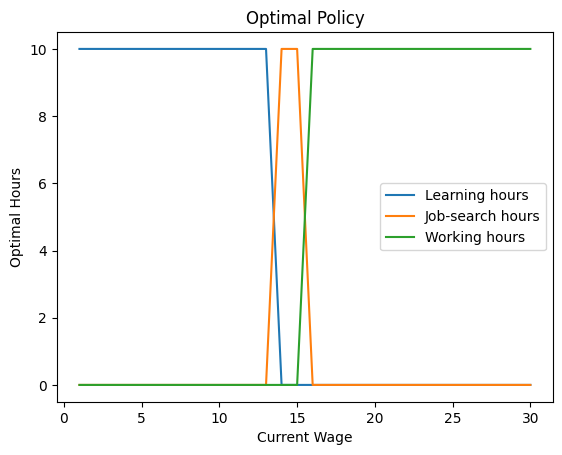

In [29]:
# fill in with Python code
opt_l = []
opt_s = []
opt_w = []
wages = []

for w in states:
    a = policy_opt[w]
    wages.append(w)
    opt_l.append(a[0])
    opt_s.append(a[1])
    opt_w.append(H - a[0] - a[1])

plt.plot(wages, opt_l, label="Learning hours")
plt.plot(wages, opt_s, label="Job-search hours")
plt.plot(wages, opt_w, label="Working hours")
plt.xlabel("Current Wage")
plt.ylabel("Optimal Hours")
plt.title("Optimal Policy")
plt.legend()
plt.show()

In this problem set up. $\gamma$ is high, which means long-term reward is nearly as important as current reward. So considering have lower salary, ideal policy is increasing salary rate first. When the salary is high enough (or reach maximum), the reational worker may use all of time to work.  
Also, when wage rate is low (lower than 14), learning is better than job-searching. The reason is Poisson distribution has better cumulative improvement than searching a new job. So, person allocated all time in learning.

## Question 4: Car Sales (Led By: Yuteng & James)

Imagine you own a car which you need to sell within a finite window of $N$ days. At the beginning of each day, you receive an offer from a dealership which is randomly distributed over the interval $[m, M]$, $0 < m < M$, with a known continuous distribution $Q$ on this support; the offers each day are i.i.d. After receiving an offer, you have to decide immediately whether to accept or reject it. If you reject the offer, it is lost, and you have to pay a parking cost for the car of $c \geq 0$, which you must pay at the end of each day you do not sell the car. After $N$ days, the car has to be sold. The parameters $m$, $M$, and $c$ are all fixed positive real numbers. Your objective is to maximize the sale proceeds.

---

### Part (A): MDP Modeling

With proper mathematical notation, model this problem fully as an **MDP** by specifying the following:
1. **States**: Define the state space
2. **Actions**: Specify the possible actions available to the seller
3. **Rewards**: Define the reward structure
4. **State-Transition Probabilities**: Specify the transition dynamics
5. **Discount Factor**: Indicate the discount factor

Additionally, discuss what particular kind of MDP this is.

---

### Part (B): Analytical Solution

Solve this MDP analytically for the **optimal policy**. Provide a detailed explanation of the steps used to derive the policy and any key conditions or assumptions required (*Note*: this is to be done mathematically, not using code).

---

### Part (C): Special Case Analysis

Consider the case where $c = 0$ and $Q(x) = U_{[m, M]}(x)$ (the uniform distribution on $[m, M]$). Solve for as closed-form a solution of the optimal policy **as possible**. To make this concrete, the functional form of your optimal policy should be explicitly defined but can depend on coefficients that are recursively defined. **You should not have integrals in your solution.**


### Part (A) Answer

- State: $s_t = \{t, q_t\}$ where t is the remaining number of days and $q_t$ is the price at that day. $0 <= t < N$. The reason we set t in reverse order is because we want to align with Bellman Equation in b).
- Actions: $a_y = \{accept, reject\}$ 
- Reward: If car owner accpet the offer with price q. reward is $r(q, accept) = q$. 
  If the car owner reject the offer, the reward is $r(q, reject) = -c$. Note that price q can be observed in the beginning of that day.
- Transition Probability: If car owner accepts the offer, $t$ will be the terminated state. And MDP ends. If car owner rejects the offer, tansition is deterministic: $s_{t+1} = s_t-1$ with probability 1. If $t = 0$, MDP ends.
- Discount Factor: We can simply set $\gamma = 1$. But, if the car owner wants to get money as soon as possible, discount factor will be less than 0 and normally fixed.
- This is the Optimal Stopping problem, which is an MDP

### Part (B) Answer

In the last day of this MDP, that is $t = 0$, the car owner must sell this car. Yielding the expected payoff of
$$
V_0 = \int_{m}^{M} q \, p(q) \, dx,
$$
where $p(q)$ is PMF of distribution Q. This is also the base case for the following Bellman Equation.
Then in each non-ending state $t$, the payoff can be represented by Bellman Equation:
$$
V_t = E_x[ \max\{ q, V_{t-1} - c\}]
$$
Then, there are two cases in this problem:
- Reject when $V_{t-1} - c > q$ with the lower bound of $m$. And the corresponding value function can be expressed by
$$
V_t = \int_{m}^{V_{t-1} - c} \left( V_{t-1} - c \right) p(q) \, dq
$$
- Accept the offer when $V(t - 1) - c \leq q$ with the upper bound of $M$.
$$
V_t = \int_{V_{t-1} - c}^{M} q \, p(q) \, dq
$$
If we combine these two cases, we have the final representation for all non-ending state (t > 1):
$$
V_t = \int_{m}^{V_{t-1} - c} \left( V_{t-1} - c \right) p(q) \, dq + \int_{V_{t-1} - c}^{M} q \, p(q) \, dq
$$


### Part (C) Answer

According to definition of uniform distribution, PDF for $t$ is :
$$
V_t = \frac {M-m}{2} = V_0
$$
By Bellman Equation, for non-ending state, we have
Then the equation from part b can be written as:
$$
\int_{m}^{V_{t-1} - c} \left( V_{t-1} - c \right) p(q) \, dq = [V_{t-1}-m]V_{t-1}\frac{1}{M-m} = \frac {V_{t-1}^2-mV_{t-1}}{M-m}
$$
$$
\int_{V_{t-1} - c}^{M} q \, p(q) \, dq = \frac{M^2 - V_{t-1}^2}{2(M-m)}
$$
Therefore, for all non-terminal states $t$, we have:
$$
V_t = [V_{t-1}-m]V_{t-1}\frac{1}{M-m} = \frac {V_{t-1}^2-mV_{t-1}}{M-m} + \frac{M^2 - V_{t-1}^2}{2(M-m)} = \frac{V_{t-1}^2 - 2mV_{t-1} + M^2}{2(M-m)}
$$
and for terminal state $t = 0$, $V(0) = \frac{M-m}{2}$

## Question 5: Constrained Consumption (Led By: Yuteng & James)

Consider the following discrete-time MDP for constrained consumption. At $t = 0$, the agent is given a finite amount $x_0 \in \mathbb{R}^+$ of a resource. In each time period, the agent can choose to consume any amount of the resource, with the consumption denoted as $c \in [0, x]$ where $x$ is the amount of the resource remaining at the start of the time period. This consumption results in a reduction of the resource at the start of the next time period:  
$$x' = x - c.$$  

Consuming a quantity $c$ of the resource provides a utility of consumption equal to $U(c)$, and we adopt the **CRRA utility function**:  
$$
U(c) = \frac{c^{1 - \gamma}}{1 - \gamma}, \quad (\gamma > 0, \gamma \neq 1)
$$

Our goal is to maximize the aggregate discounted utility of consumption until the resource is completely consumed. We assume a discount factor of $\beta \in [0, 1]$ when discounting the utility of consumption over any single time period.

We model this as a **discrete-time, continuous-state-space, continuous-action-space, stationary, deterministic MDP**, and so our goal is to solve for the **Optimal Value Function** and associated **Optimal Policy**, which will give us the optimal consumption trajectory of the resource. Since this is a stationary MDP, the **State** is simply the amount $x$ of the resource remaining at the start of a time period. The **Action** is the consumption quantity $c$ in that time period. The **Reward** for a time period is $U(c)$ when the consumption in that time period is $c$. The discount factor over each single time period is $\beta$.

We assume that the **Optimal Policy** is given by:  
$$
c^* = \theta^* \cdot x \quad \text{for some } \theta^* \in [0, 1].
$$

---

### Part (A): Closed-form Expression for $V_\theta(x)$

Our first step is to consider a fixed deterministic policy, given by:  
$$c = \theta \cdot x \quad \text{for some fixed } \theta \in [0, 1].$$  
Derive a closed-form expression for the **Value Function** $V_\theta(x)$ for a fixed deterministic policy, given by $c = \theta \cdot x$. Specifically, you need to express $V_\theta(x)$ in terms of $\beta$, $\gamma$, $\theta$, and $x$.

---

### Part (B): Solving for $\theta^*$

Use this closed-form expression for $V_\theta(x)$ to solve for the $\theta^*$ which maximizes $V_\theta(x)$ (thus fetching us the **Optimal Policy** given by $c^* = \theta^* \cdot x$).

---

### Part (C): Expression for $V^*(x)$

Use this expression for $\theta^*$ to obtain an expression for the **Optimal Value Function** $V^*(x)$ in terms of only $\beta$, $\gamma$, and $x$.

---

### Part (D): Validation of the Bellman Equation

Validate that the **Optimal Policy** (derived in part B) and **Optimal Value Function** (derived in part C) satisfy the **Bellman Optimality Equation**.

### Part (A) Answer

Given $c = \theta x_t$, we can have $x_1 = x - \theta x$, $x_2 = x_1 - \theta x = x(1-\theta) - \theta x (1 - \theta) = x(1-\theta)^2$ ...
By recursively replace $x_t$, we can have 
$$
x_t = (1 - \theta)^t x
$$
And therefore, $c_t = \theta (1-\theta)^t x$
When we substitude $c_t$ in utility function, we can have:
$$
u(c_t) = \frac{[\theta(1-\theta^t x)]^{1-\gamma}}{1-\gamma}
$$
Then compute the value function:
$$
\begin{align}
V_{\theta}(x) &= \sum_{t=0}^{inf} \beta^t u(c_t) \\
&= \sum_{t=0}^{inf} \beta^t \frac{[\theta(1-\theta^t x)]^{1-\gamma}}{1-\gamma} \\
&= \frac{(\theta x)^{1 - \gamma}}{1-\gamma} \sum_{t=0}^{inf} (\beta (1-\theta)^{1 - \gamma})^{t} \\
&= \frac{(\theta x)^{1 - \gamma}}{1-\gamma} \frac{1}{1 - \beta (1-\theta)^{1 - \gamma}} \\
&= \frac {(\theta x)^{1 - \gamma}}{(1-\gamma)(1 - \beta (1-\theta)^{1 - \gamma})}
\end{align}
$$

### Part (B) Answer
In part (A), we have 
$$
V_{\theta}(x) = \frac {(\theta x)^{1 - \gamma}}{(1-\gamma)(1 - \beta (1-\theta)^{1 - \gamma})}
= \frac{x^{1 - \gamma}}{1-\gamma} \frac{\theta^{1 - \gamma}}{1 - \beta (1-\theta)^{1 - \gamma}}
$$
We notice that the first part of fraction is independent from $\theta$, we only consider the second part of fraction. Since logging will not change the maximum, we consider
$$
g(x) = ln(\frac{\theta^{1 - \gamma}}{1 - \beta (1-\theta)^{1 - \gamma}}) = (1 - \gamma)ln(\theta) - ln(1 - \beta (1-\theta)^{1 - \gamma})
$$
We calculate the FOC of $g(x)$ instead,
$$
g'(x) = \frac{1 - \gamma}{ln\theta} - \frac{\beta (1 - \gamma) (1 - \theta)^{-\gamma}}{1 - \beta(1 - \theta)^{1  -\gamma}} = 0
$$
$$
1 - \gamma = \beta (1 - \gamma) (1 - \theta)^{1  -\gamma}
$$
$$
(1 - \theta)^{\gamma} = \beta
$$
$$
\theta^* = 1 - \beta^{\frac{1}{\gamma}}
$$

### Part (C) Answer

According to $\theta^* = 1 - \beta^{\frac{1}{\gamma}}$ we got from part b, we can have
$$
\begin{aligned}
V_{\theta^*}(x) &= \frac{(\theta^* x)^{1 - \gamma}}{(1 - \gamma)(1-\beta (1-\theta^*)^{1 - \gamma})} \\
&= \frac{((1 - \beta^{\frac{1}{\gamma}}) x)^{1 - \gamma}}{(1 - \gamma)(1-\beta (1-(1 - \beta^{\frac{1}{\gamma}}))^{1 - \gamma})} \\
&= \frac{((1 - \beta^{\frac{1}{\gamma}}) x)^{1 - \gamma}}{(1 - \gamma)(1-\beta^\frac{1}{\gamma})} \\
&= \frac{x^{1 - \gamma} (1 - \beta^{\frac{1}{\gamma}})^{1 - \gamma}}{(1 - \gamma)(1-\beta^\frac{1}{\gamma})} \\
&= \frac{x^{1 - \gamma} (1 - \beta^{\frac{1}{\gamma}})^{- \gamma}}{1 - \gamma}
\end{aligned}
$$


### Part (D) Answer

To show the optimal policy we got from question B and question C are same by using Bellman Equation, it's equivalent to show $V*(x)$ has already converged, that is:
$$
V^*(x) = \max_{c}\{U(c) + \beta V^*(x-c)\} = U(c^*) + \beta V^*(x-c^*)
$$
From the best stratagy, we have $ c^*(x) = (1 - \beta^{\frac{1}{\gamma}})x $, which means $x-c^* = \beta^{\frac{1}{\gamma}} x $
Then the optimal bellman equation can be written as
$$
\begin{aligned}
U(c^*(x))+ \beta V^*(x-c^*) 
&=  \frac{[(1-\beta ^{\frac{1}{\gamma}})x]^{1 - \gamma}}{1 - \gamma} + \beta \frac{(\beta^{\frac{1}{\gamma}}x)^{1 - \gamma}}{1 - \gamma} (1 - \beta ^{\frac{1}{\gamma}})^{-\gamma} \\
&= (\frac{x^{1 - \gamma}}{1 - \gamma})   [(1-\beta ^{\frac{1}{\gamma}})^{1 - \gamma} + \beta  (\beta^{\frac{1}{\gamma}})^{1 - \gamma}  (1-\beta ^{\frac{1}{\gamma}})^{- \gamma}] \\
&= (\frac{x^{1 - \gamma}}{1 - \gamma})   [(1-\beta ^{\frac{1}{\gamma}})^{1 - \gamma} + (\beta^{\frac{1}{\gamma}})  (1-\beta ^{\frac{1}{\gamma}})^{- \gamma}] \\
&= (\frac{x^{1 - \gamma}}{1 - \gamma})   [(1-\beta ^{\frac{1}{\gamma}})^{- \gamma} + (1 - \beta^{\frac{1}{\gamma}} + \beta^{\frac{1}{\gamma}})] \\
&= (\frac{x^{1 - \gamma}}{1 - \gamma})   [(1-\beta ^{\frac{1}{\gamma}})^{- \gamma}] \\
&= V_{\theta ^*}(x)

\end{aligned}
$$


## Question 6: TD and MC Algorithms (Led By: Yuteng & James)

In this question, we explore the connection between **Temporal Difference (TD)** and **Monte Carlo (MC)** algorithms.

---

### Part (A): Implementing TD($\lambda$) Prediction Algorithm

Implement the **TD($\lambda$) Prediction algorithm** from scratch in Python code. First, implement it for the **Tabular case**. Next, implement it for the **Function Approximation case**.  

Provide clear and well-commented code for both implementations, and describe any assumptions or simplifications made.

---

### Part (B): Proof of MC Error as Sum of Discounted TD Errors

Prove that the **MC Error** can be written as the sum of discounted TD errors, i.e.,  
$$
G_t - V(S_t) = \sum_{u=t}^{T-1} \gamma^{u-t} \cdot \big( R_{u+1} + \gamma \cdot V(S_{u+1}) - V(S_u) \big)
$$

Work this out from scratch, rather than relying on general results from class or the textbook.

---

### Part (C): Code Extension

Extend `RandomWalkMRP` (in [rl/chapter10/random_walk_mrp.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter10/random_walk_mrp.py)) to `RandomWalkMRP2D` which is a random walk in 2-D with states $\{i, j) | 0 \leq i \leq B_1, 0 \leq j \leq B_2\}$ with terminal states as $(0, j)$ and $(B_1, j)$ for all $j$, $(i, 0)$ and $(i, B_2)$ for all $i$, and with reward of 0 for all $(0, j)$ and for all $(i, 0)$, reward of 1 for all $(B_1, j)$ and for all $(i, B_2)$, and with discrete probabilities of 4 movements - UP, DOWN, LEFT, RIGHT from any non-terminal state. Analyze the convergence of MC and TD on this `RandomWalkMRP2D` much like how we analyzed it for `RandomWalkMRP`, along with plots of similar graphs.

Only modify the code where the message `fill in` is noted.

### Part (A) Answer

In [ ]:
def td_lambda_tabular(
        env,          # assume env is an environment that can generate episodes
        num_episodes: int,
        gamma: float,
        alpha: float,
        lam: float,
        state_space, 
        max_steps: int = 1000
    ) -> np.ndarray:
    
    # Initialize value function: a dictionary or array
    V = {s: 0.0 for s in state_space}
    
    for _ in range(num_episodes):
        # Reset the environment, get initial state
        s = env.reset()
        
        # Initialize eligibility traces
        E = {state: 0.0 for state in state_space}
        
        for t in range(max_steps):
            # Take an action according to a given policy (assume env does that internally or we provide it)
            next_s, r, done, info = env.step()
            
            # TD Error
            delta = r + gamma * V[next_s] - V[s]
            
            # Update eligibility trace for current state
            E[s] += 1.0
            
            # Update all states
            for state in state_space:
                V[state] += alpha * delta * E[state]
                # Decay eligibility traces
                E[state] *= gamma * lam
            
            s = next_s
            
            if done:
                break
    
    return V

import numpy as np

def td_lambda_linear_approx(
        env,
        num_episodes: int,
        gamma: float,
        alpha: float,
        lam: float,
        feature_func,  # function: state -> np.array of features
        d: int,        # dimension of feature vectors
        max_steps: int = 1000
    ) -> np.ndarray:
    
    w = np.zeros(d)  # parameter vector
    
    for _ in range(num_episodes):
        s = env.reset()
        e = np.zeros(d)  # eligibility trace
        
        for t in range(max_steps):
            phi_s = feature_func(s)
            v_s = np.dot(w, phi_s)  # current value estimate
            
            next_s, r, done, info = env.step()
            phi_next_s = feature_func(next_s)
            v_next_s = np.dot(w, phi_next_s)
            
            delta = r + gamma * v_next_s - v_s
            
            # Update eligibility trace
            e = gamma * lam * e + phi_s
            
            # Update weights
            w += alpha * delta * e
            
            s = next_s
            if done:
                break
    
    return w


### Part (B) Answer

Want to show 
$$
G_t - V(S_t) = \sum_{u=t}^{T-1} \gamma^{u-t} \cdot \big( R_{u+1} + \gamma \cdot V(S_{u+1}) - V(S_u) \big)
$$
We prove this by induction in backward order, since in above formula, time t based on t + 1.  
- Base case: $t = T-1$  
$$
G_{T-1} - V(s_{T-1}) = R_t + \gamma V(s_T) - V(s_{T-1}) = \sum^{T-1}_{u=T-1} \gamma^{u-T+1}(R_u + \gamma V(s_u) - V(s_{u-1}))
$$
which shows base case holds

- Induction Hypothesis:  
Suppose this holds at $t + 1$, that is
$$
G_{t+1} - V(s_{t+1}) = \sum^{T-1}_{u=t+1} \gamma^{u-t-1}(R_{u+1} + \gamma V(s_{u+1}) - V(s_{u-1}))
$$
Then in we need to prove it holds at $t$:
$$
\begin{aligned}
G_t - V(s_t)
&= R(t+1) + \gamma G(t+1) - V(s_t) \\
&= R(t+1) - V(s_t) + \gamma V(t+1) -\gamma V(t+1)  + \gamma G(t+1)  \\
&= R(t+1) + \gamma V(t+1) - V(s_t) + \gamma(G(t+1) - V(t+1))    \\
&= R(t+1) + \gamma V(t+1) - V(s_t) + \gamma(\sum^{T-1}_{u=t+1} \gamma^{u-t-1}(R_{u+1} + \gamma V(s_{u+1}) - V(s_{u-1})))    \\
&= R(t+1) + \gamma V(t+1) - V(s_t) + \sum^{T-1}_{u=t+1} \gamma^{u-t}(R_{u+1} + \gamma V(s_{u+1}) - V(s_{u-1})) \\
&= \sum^{T-1}_{u=t} \gamma^{u-t}(R_{u+1} + \gamma V(s_{u+1}) - V(s_{u-1}))
\end{aligned}
$$

### Part (C) Answer

In [3]:
from typing import Mapping, Dict, Tuple
from rl.markov_process import FiniteMarkovRewardProcess
from rl.chapter10.prediction_utils import compare_td_and_mc
from rl.distribution import Categorical

class RandomWalkMRP2D(FiniteMarkovRewardProcess[int]):
    barrier: Tuple[int]
    p: Tuple[float]

    def __init__(
        self,
        barrier: Tuple[int],
        p: Tuple[float]
    ):
        self.barrier = barrier
        self.p = p
        super().__init__(self.get_transition_map())

    def get_transition_map(self) -> Mapping[Tuple[int], Categorical[Tuple[Tuple[int], float]]]:
        '''
        fill in the code below to define the dictionary, d, and then run the code in the next cell for the visualization
        '''
        d: Dict[Tuple[int], Categorical[Tuple[Tuple[int], float]]] = {}
        B1, B2 = self.barrier

        for i in range(1, B1):
            for j in range(1, B2):
                transitions = {}

                next_state = (i, j+1)
                reward = 1.0 if (j+1 == B2) else 0.0
                transitions[(next_state, reward)] = self.p[0]

                next_state = (i, j-1)
                reward = 0.0
                transitions[(next_state, reward)] = self.p[1]

                next_state = (i-1, j)
                reward = 0.0
                transitions[(next_state, reward)] = self.p[2]

                next_state = (i+1, j)
                reward = 1.0 if (i+1 == B1) else 0.0
                transitions[(next_state, reward)] = self.p[3]

                d[(i, j)] = Categorical(transitions)
        return d

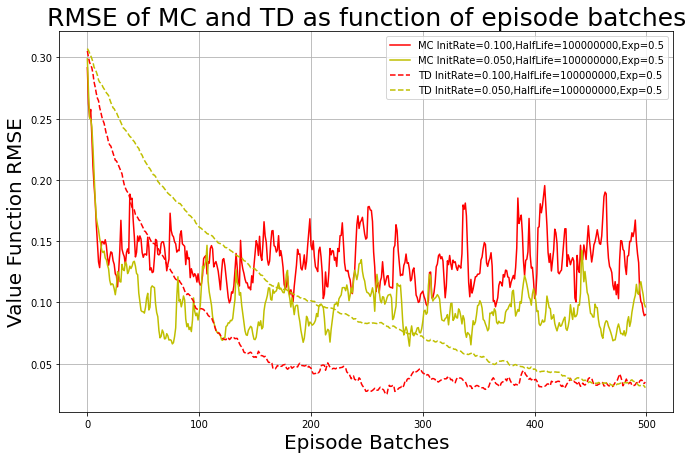

In [4]:
this_barrier: Tuple[int] = (10, 10)
this_p: Tuple[float] = (0.2, 0.3, 0.25, 0.25)
random_walk: RandomWalkMRP2D = RandomWalkMRP2D(
    barrier=this_barrier,
    p=this_p
)
compare_td_and_mc(
    fmrp=random_walk,
    gamma=1.0,
    mc_episode_length_tol=1e-6,
    num_episodes=3500,
    learning_rates=[(.1, 1e8, .5), (.05, 1e8, .5)],
    initial_vf_dict={s: 0.5 for s in random_walk.non_terminal_states},
    plot_batch=7,
    plot_start=0
)

## Problem 7: Double Q-Learning (Led By: Yuteng & James)

It is known that **Q-Learning** can suffer from a maximization bias during finite-sample training. In this problem, we consider the following modification to the **Tabular Q-Learning** algorithm called **Double Q-Learning**:

---

### **Algorithm 1: Double Q-Learning**

**Initialize** $Q_1(s, a)$ and $Q_2(s, a)$ $\forall s \in \mathcal{N}$, $a \in \mathcal{A}$  
**yield** estimate of $Q$

**while** True **do**  
&emsp; **select** initial state $s_0$, **set** $t = 0$  
&emsp; **while** $s_t \in \mathcal{N}$ **do**  
&emsp;&emsp; **select** $a_t$ using $\epsilon$-greedy based on this greedy policy: $\pi(s) = \arg \max_a \big( Q_1(s_t, a) + Q_2(s_t, a) \big)$  
&emsp;&emsp; **observe** $(r_t, s_{t+1})$  
&emsp;&emsp; **if** with 0.5 probability **then**  
&emsp;&emsp;&emsp; $Q_1(s_t, a_t) \leftarrow Q_1(s_t, a_t) + \alpha \big( r_t + \gamma Q_2(s_{t+1}, \arg \max_a Q_2(s_{t+1}, a)) - Q_1(s_t, a_t) \big)$  

&emsp;&emsp; **else**  
&emsp;&emsp;&emsp; $Q_2(s_t, a_t) \leftarrow Q_2(s_t, a_t) + \alpha \big( r_t + \gamma Q_1(s_{t+1}, \arg \max_a Q_1(s_{t+1}, a)) - Q_2(s_t, a_t) \big)$  

&emsp;&emsp; $t = t + 1$  
&emsp;&emsp; $s_t = s_{t+1}$  

**yield** estimate of $Q$

---

### **Algorithm 2: Q-Learning**

**Initialize** $Q(s, a)$ $\forall s \in \mathcal{N}$, $a \in \mathcal{A}$  
**yield** $Q$

**while** True **do**  
&emsp; **select** initial state $s_0$, **set** $t = 0$  
&emsp; **while** $s_t \in \mathcal{N}$ **do**  
&emsp;&emsp; **select** $a_t$ using $\epsilon$-greedy based on this greedy policy: $\pi(s) = \arg \max_a Q(s_t, a)$  
&emsp;&emsp; **observe** $(r_t, s_{t+1})$  
&emsp;&emsp; $Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \big( r_t + \gamma Q(s_{t+1}, \arg \max_a Q(s_{t+1}, a)) - Q(s_t, a_t) \big)$  
&emsp;&emsp; $t = t + 1$  
&emsp;&emsp; $s_t = s_{t+1}$  

**yield** $Q$

---

### Instructions:
The code skeleton for this problem is provided below. Implement the following functions: `double_q_learning` and `q_learning`. Once implemented, you can run the code. You will get a graph of the estimated q-value plotted against the episode number. Comment on your observations, and explain the benefits/drawbacks of the double q-learning algorithm for general MDPs.

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt

from dataclasses import dataclass
from collections import defaultdict
from typing import Mapping, Iterator, TypeVar, Tuple, Dict, Iterable, Generic

# RL imports (adapt or remove if you don't have the same environment):
from rl.distribution import (
    Distribution, Constant, Gaussian, Choose, SampledDistribution, Categorical
)
from rl.markov_process import NonTerminal, State, Terminal
from rl.markov_decision_process import MarkovDecisionProcess
from rl.td import epsilon_greedy_action

S = TypeVar('S')
A = TypeVar('A')

In [9]:
# -----------------------------------------------------------------------
# Tabular Q-value function approximation (done for you)
# -----------------------------------------------------------------------
class TabularQValueFunctionApprox(Generic[S, A]):
    """
    A basic implementation of a tabular function approximation 
    with constant learning rate of 0.1
    Also tracks the number of updates per (state, action).
    """
    def __init__(self):
        self.counts: Mapping[Tuple[NonTerminal[S], A], int] = defaultdict(int)
        self.values: Mapping[Tuple[NonTerminal[S], A], float] = defaultdict(float)
    
    def update(self, k: Tuple[NonTerminal[S], A], target: float) -> None:
        alpha = 0.1
        old_val = self.values[k]
        self.values[k] = (1 - alpha) * old_val + alpha * target
        self.counts[k] += 1
    
    def __call__(self, x: Tuple[NonTerminal[S], A]) -> float:
        return self.values[x]

In [10]:
# -----------------------------------------------------------------------
# Double Q-Learning (fill in)
# -----------------------------------------------------------------------
def double_q_learning(
    mdp: MarkovDecisionProcess[S, A],
    states: Distribution[NonTerminal[S]],
    gamma: float
) -> Iterator[TabularQValueFunctionApprox[S, A]]:
    """
    Implements Double Q-Learning as described:
      1) We keep two Q-tables, Q1 and Q2.
      2) We choose actions epsilon-greedily with respect to Q1+Q2.
      3) With 50% chance we update Q1 using next-action chosen by max of Q2,
         otherwise update Q2 using next-action chosen by max of Q1.
    """
    Q1 = TabularQValueFunctionApprox()
    Q2 = TabularQValueFunctionApprox()
    epsilon = 0.1  # exploration probability

    class CombinedQ(TabularQValueFunctionApprox):
        def __call__(self, x: Tuple[NonTerminal[S], A]) -> float:
            return Q1(x) + Q2(x)

    while True:
        state = states.sample()  # initial state s0
        while isinstance(state, NonTerminal):
            actions = list(mdp.actions(state))
            # Epsilon-greedy based on Q1+Q2:
            if random.random() < epsilon:
                action = random.choice(actions)
            else:
                combined_vals = [Q1((state, a)) + Q2((state, a)) for a in actions]
                max_val = max(combined_vals)
                # Break ties uniformly at random.
                best_actions = [a for a, v in zip(actions, combined_vals) if v == max_val]
                action = random.choice(best_actions)
    
            next_state, reward = mdp.step(state, action).sample()
            
            # With 50% chance update Q1 (using next-action chosen by Q2).
            if random.random() < 0.5:
                if isinstance(next_state, NonTerminal):
                    next_actions = list(mdp.actions(next_state))
                    vals_next = [Q2((next_state, a)) for a in next_actions]
                    max_val_next = max(vals_next)
                    best_next = [a for a, v in zip(next_actions, vals_next) if v == max_val_next]
                    next_a = random.choice(best_next)
                    target = reward + gamma * Q2((next_state, next_a))
                else:
                    target = reward
                Q1.update((state, action), target)
            # Otherwise update Q2 (using next-action chosen by Q1).
            else:
                if isinstance(next_state, NonTerminal):
                    next_actions = list(mdp.actions(next_state))
                    vals_next = [Q1((next_state, a)) for a in next_actions]
                    max_val_next = max(vals_next)
                    best_next = [a for a, v in zip(next_actions, vals_next) if v == max_val_next]
                    next_a = random.choice(best_next)
                    target = reward + gamma * Q1((next_state, next_a))
                else:
                    target = reward
                Q2.update((state, action), target)
            
            state = next_state  

        yield CombinedQ()

In [11]:
# -----------------------------------------------------------------------
# Standard Q-Learning (fill in)
# -----------------------------------------------------------------------
def q_learning(
    mdp: MarkovDecisionProcess[S, A],
    states: Distribution[NonTerminal[S]],
    gamma: float
) -> Iterator[TabularQValueFunctionApprox[S, A]]:
    """
    Standard Q-Learning:
      1) Keep one Q table
      2) Epsilon-greedy wrt that table
      3) Update Q((s,a)) with  r + gamma * max_{a'} Q((s_next, a'))
    """
    Q = TabularQValueFunctionApprox()
    epsilon = 0.1  # exploration probability

    while True:
        state = states.sample()  # initial state s0
        while isinstance(state, NonTerminal):
            actions = list(mdp.actions(state))
            if random.random() < epsilon:
                action = random.choice(actions)
            else:
                vals = [Q((state, a)) for a in actions]
                max_val = max(vals)
                best_actions = [a for a, v in zip(actions, vals) if v == max_val]
                action = random.choice(best_actions)
            
            next_state, reward = mdp.step(state, action).sample()
            if isinstance(next_state, NonTerminal):
                next_actions = list(mdp.actions(next_state))
                max_next = max(Q((next_state, a)) for a in next_actions)
                target = reward + gamma * max_next
            else:
                target = reward
            Q.update((state, action), target)
            state = next_state

        yield Q

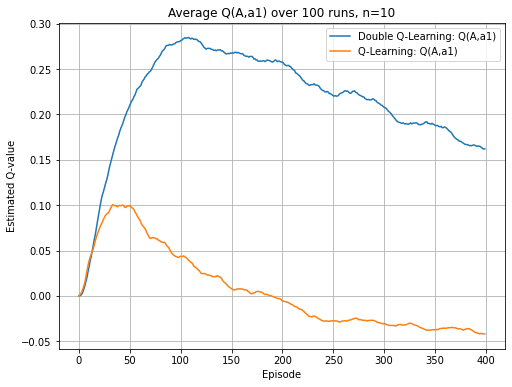

In [12]:
# -----------------------------------------------------------------------
# The MDP: States A,B and actions a1,a2,b1,...,bn (don't modify anything anymore, just run to get the graphs)
# -----------------------------------------------------------------------
@dataclass(frozen=True)
class P1State:
    """
    The MDP state, storing whether we are in "A" or "B".
    """
    name: str

class P1MDP(MarkovDecisionProcess[P1State, str]):
    
    def __init__(self, n: int):
        self.n = n

    def actions(self, state: NonTerminal[P1State]) -> Iterable[str]:
        """
        Return the actions available from this state.
          - if state is A => ["a1", "a2"]
          - if state is B => ["b1", ..., "bn"]
        """
        if state.state.name == "A":
            return ["a1", "a2"]
        else:
            return [f"b{i}" for i in range(1, self.n+1)]
    
    def step(
        self,
        state: NonTerminal[P1State],
        action: str
    ) -> Distribution[Tuple[State[P1State], float]]:
        """
        Return the distribution of (next state, reward) from (state, action):
          - A + a1 => reward 0, next state B
          - A + a2 => reward 0, next state terminal
          - B + b_i => reward ~ Normal(-0.1,1), next state terminal
        """
        if state.state.name == "A":
            if action == "a1":
                return Constant((NonTerminal(P1State("B")), 0.0))
            else:
                return Constant((Terminal(P1State("T")), 0.0))
        else:
            # For B + b_i => reward ~ N(-0.1,1), then terminal
            def sampler():
                r = np.random.normal(loc=-0.1, scale=1.0)
                return (Terminal(P1State("T")), r)
            return SampledDistribution(sampler)

def run_double_q_once(mdp, start_dist, gamma=1.0, episodes=400):
    """
    Runs one 'chain' of Double Q-Learning for 'episodes' episodes,
    returning a list of Q-values for Q((A,a1)) at the end of each episode.
    """
    dq_iter = double_q_learning(mdp, start_dist, gamma)  # generator
    vals = []
    for _ in range(episodes):
        Q1 = next(dq_iter)
        # record Q1((A,a1)) each time
        qA1 = Q1((NonTerminal(P1State("A")), "a1"))
        vals.append(qA1)
    return vals

def run_q_once(mdp, start_dist, gamma=1.0, episodes=400):
    """
    Same but for standard Q-Learning
    """
    q_iter = q_learning(mdp, start_dist, gamma)
    vals = []
    for _ in range(episodes):
        Q = next(q_iter)
        qA1 = Q((NonTerminal(P1State("A")), "a1"))
        vals.append(qA1)
    return vals

def main():
    # For reproducibility
    random.seed(0)
    np.random.seed(0)

    n = 10
    mdp = P1MDP(n)
    # Always start in A, as a NonTerminal
    start_dist = Constant(NonTerminal(P1State("A")))

    N_RUNS = 100
    N_EPISODES = 400

    all_dbl = []
    all_std = []

    for _ in range(N_RUNS):
        dbl_vals = run_double_q_once(mdp, start_dist, gamma=1.0, episodes=N_EPISODES)
        std_vals = run_q_once(mdp, start_dist, gamma=1.0, episodes=N_EPISODES)
        all_dbl.append(dbl_vals)
        all_std.append(std_vals)

    arr_dbl = np.array(all_dbl)
    arr_std = np.array(all_std)

    avg_dbl = np.mean(arr_dbl, axis=0)
    avg_std = np.mean(arr_std, axis=0)

    plt.figure(figsize=(8,6))
    plt.plot(avg_dbl, label='Double Q-Learning: Q(A,a1)')
    plt.plot(avg_std, label='Q-Learning: Q(A,a1)')
    plt.xlabel('Episode')
    plt.ylabel('Estimated Q-value')
    plt.title('Average Q(A,a1) over 100 runs, n=10')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

In early stage (first 40 rounds), Q-learning has larger updating speed (slope) than double Q-learning. In long-run, double Q-learning reach higher Q-value and change more stable than Q-learning. However, after increasing in the early stage, Q-learning  decrease dramanicallyin long run and even reach negative Q-value at end.  
This shows that becasue of only updating single Q-value, Q-learning has faster updating speed but is more unstable and biased. By updating 2 Q-values, double Q-learning update slower but is more stable and less biased.

## Problem 8: Dice Rolling Game (Led By: Yuqing & James)

Consider the following dice game. You start with $N$ $K$-sided dice on the table, and no dice in your hand. The values on the dice faces are $\{1, 2, ..., K\}$. While you have dice remaining on the table, the game proceeds as follows:

1. **Roll all the dice on the table.**  
2. **Select a nonempty subset of the dice on the table to move to your hand.**  
   - The dice you move to your hand keep the value which they were just rolled.  
   - For example, if your hand is $\{1, 3\}$ and you roll $\{2, 2, 3, 4\}$ on the table, and you decide to move the dice with $3$ and $4$ to your hand, you will now have $\{1, 3, 3, 4\}$ in your hand.

The game ends when you have no dice on the table left to roll. Your score for the game is then calculated as the sum of the values of dice in your hand **if you have at least $C$ 1’s in your hand**, and zero otherwise. For example:
- For $N = K = 4$ and $C = 2$, the score corresponding to a hand containing $\{1, 3, 1, 4\}$ would be $9$, while the score corresponding to a hand containing $\{4, 1, 3, 4\}$ would be $0$.

Your goal is to **maximize your score** at the end of the game.

---

### Part (A): MDP Modeling

With proper mathematical notation, model this as a **Finite MDP** specifying the following:
- **States**
- **Actions**
- **Rewards**
- **State-Transition Probabilities**
- **Discount Factor**

---

### Part (B): Python Implementation

Implement this MDP in Python. If you wish, you may use the code in the git repo that you forked at the start of the course (e.g., `FiniteMarkovDecisionProcess`), but if you prefer, you can implement it from scratch or use any code you have written for the course previously (whichever is more convenient for you). You should implement this for the **general case**, specifically your MDP implementation should take as parameters $N$, $K$, $C$.

For $N = 6$, $K = 4$, $C = 1$, use the `dynamic_programming.py` library (or your own code if you chose not to implement it within the class library) to solve for the **optimal value function**, and present the following values:

1. The **expected score** of the game playing optimally, calculated using your code, not analytically.
2. The **optimal action** when rolling $\{1, 2, 2, 3, 3, 4\}$ on the first roll.

### Part (A) Answer

States: we can track the states (m, w, t), where m is # of 1 in hand, w is the sum of all dices in hand, and t is the # of dice left on the table.

Actions: after observing the outcome of each row, let us denote the outcome of the roll of dice on the table as X of size t with each die independently uniform in {1,2,3,...,K}. The action a(X) = A, where A is a subset of X and A is non empty. 

Rewards:
Reward is given only at the terminal state (m,w,0). By cases, when m >= C, the reward is w, otherwise 0.

In formal, we can express it as:
R((m,w,t), a, (m',w',t')) = 0 if t > 0
R((m,w,t), a, (m',w',t')) = w' if t = 0 and m' >= C
R((m,w,t), a, (m',w',t')) = 0 if t = 0 and m' < C

State-Transition:
Denote Δm= number of 1s in A, Δw= sum of all faces in A, Δt = -|A| = how many dice we remove from the table. Then, we have:

P((m',w',t') | (m, w, t), a) = 1/(K^t), where (m', w', t') = (m+Δm, w+Δw, t+Δt).


The discount factor gamma is 1.

### Part (B) Answer

In [5]:
from __future__ import annotations
from itertools import product, combinations
from collections import deque
from typing import Dict, Tuple, Any, Mapping, Set, Iterable, FrozenSet

from rl.distribution import Categorical, Constant
from rl.markov_decision_process import FiniteMarkovDecisionProcess, Terminal, NonTerminal
from rl.dynamic_programming import value_iteration_result

State = Tuple[Any, ...]
Action = Any


def all_nonempty_subsets(iterable: Iterable[int]) -> Iterable[FrozenSet[int]]:
    s = list(iterable)
    return (frozenset(comb) for r in range(1, len(s) + 1) for comb in combinations(s, r))


def build_dice_game_mdp(N: int, K: int, C: int) -> FiniteMarkovDecisionProcess[State, Action]:
    mapping: Dict[State, Dict[Action, Categorical[Tuple[State, float]]]] = {}
    visited: Set[State] = set()
    queue = deque()

    initial_state: State = ("roll", 0, 0, N)
    queue.append(initial_state)
    visited.add(initial_state)

    while queue:
        state = queue.popleft()

        if state[0] == "roll":
            tag, m, w, t = state
            outcomes = {}
            for outcome in product(range(1, K + 1), repeat=t):
                next_state: State = ("dec", m, w, t, outcome)
                outcomes[(next_state, 0.0)] = outcomes.get((next_state, 0.0), 0) + 1.0
                if next_state not in visited:
                    visited.add(next_state)
                    queue.append(next_state)
            for key in outcomes:
                outcomes[key] /= (K ** t)
            mapping[state] = {"roll": Categorical(outcomes)}

        elif state[0] == "dec":
            tag, m, w, t, outcome = state
            action_dict: Dict[Action, Categorical[Tuple[State, float]]] = {}
            indices = list(range(t))
            for action in all_nonempty_subsets(indices):
                chosen = [outcome[i] for i in sorted(action)]
                new_m = m + sum(1 for x in chosen if x == 1)
                new_w = w + sum(chosen)
                new_t = t - len(chosen)
                if new_t > 0:
                    next_state: State = ("roll", new_m, new_w, new_t)
                    reward = 0.0
                else:
                    r = new_w if new_m >= C else 0.0
                    next_state = Terminal((new_m, new_w, 0))
                    reward = r
                action_dict[action] = Categorical({(next_state, reward): 1.0})
                if not isinstance(next_state, Terminal) and next_state not in visited:
                    visited.add(next_state)
                    queue.append(next_state)
            mapping[state] = action_dict

    return FiniteMarkovDecisionProcess(mapping)


def pretty_action(state: State, action: Action) -> str:
    outcome = state[4]
    chosen_values = [outcome[i] for i in sorted(action)]
    return f"Keep dice with values {chosen_values}"

N = 6
K = 4
C = 1
gamma = 1.0

mdp = build_dice_game_mdp(N, K, C)
opt_vf, opt_policy = value_iteration_result(mdp, gamma)

initial_state: State = ("roll", 0, 0, N)
initial_value = opt_vf[NonTerminal(initial_state)]
print("Optimal expected score starting from state (0, 0, 6):", initial_value)

first_roll_outcome = (1,2, 2, 3, 3, 4)
decision_state: S = ("dec", 0, 0, N, first_roll_outcome)
print("Optimal expected score starting from state (0, 0, 6), after observing (1,2,2,3,3,4):", opt_vf[NonTerminal(decision_state)])

Optimal expected score starting from state (0, 0, 6): 18.390390253776786
Optimal expected score starting from state (0, 0, 6), after observing (1,2,2,3,3,4): 18.376703715883195


In [3]:
print("\n--- Debug info for decision state ---")
action_dict = mdp.mapping[NonTerminal(decision_state)]
for action, distribution in action_dict.items():
    chosen_values = [first_roll_outcome[i] for i in sorted(action)]
    for (next_state, reward), prob in distribution:
        if not isinstance(next_state, Terminal):
            next_state_value = opt_vf[next_state]
        else:
            next_state_value = reward
        print(f"Action {sorted(action)} (keep {chosen_values}) --> Next state: {next_state}, "
              f"reward: {reward}, prob: {prob:.4f}, value: {next_state_value:.4f}")


--- Debug info for decision state ---
Action [0] (keep [1]) --> Next state: NonTerminal(state=('roll', 1, 1, 5)), reward: 0.0, prob: 1.0000, value: 18.0609
Action [1] (keep [2]) --> Next state: NonTerminal(state=('roll', 0, 2, 5)), reward: 0.0, prob: 1.0000, value: 16.4034
Action [2] (keep [2]) --> Next state: NonTerminal(state=('roll', 0, 2, 5)), reward: 0.0, prob: 1.0000, value: 16.4034
Action [3] (keep [3]) --> Next state: NonTerminal(state=('roll', 0, 3, 5)), reward: 0.0, prob: 1.0000, value: 17.3901
Action [4] (keep [3]) --> Next state: NonTerminal(state=('roll', 0, 3, 5)), reward: 0.0, prob: 1.0000, value: 17.3901
Action [5] (keep [4]) --> Next state: NonTerminal(state=('roll', 0, 4, 5)), reward: 0.0, prob: 1.0000, value: 18.3767
Action [0, 1] (keep [1, 2]) --> Next state: NonTerminal(state=('roll', 1, 3, 4)), reward: 0.0, prob: 1.0000, value: 16.1899
Action [0, 2] (keep [1, 2]) --> Next state: NonTerminal(state=('roll', 1, 3, 4)), reward: 0.0, prob: 1.0000, value: 16.1899
Actio

Expected Score: 18.39

Optimal Action: Take the dice with value 4